# Global Power Plant Database

 The database covers approximately 35,000 power plants from 167 countries and includes thermal plants (e.g. coal, gas, oil, nuclear, biomass, waste, geothermal) and renewables (e.g. hydro, wind, solar). Each power plant is geolocated and entries contain information on plant capacity, generation, ownership, and fuel type. It will be continuously updated as data becomes available.
 

## TO PREDICT

1) Primary Fuel    2) capacity_mw

### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt #For EDA purpose
%matplotlib inline   
import seaborn as sns  #EDA purpose
import warnings  #bypass Warning
warnings.filterwarnings('ignore')

from collections import Counter
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

Load Data

In [2]:
df = pd.read_csv("electricity.csv")

In [3]:
df.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,WRI,NaN,2018.0,631.777928,617.789264,843.747,886.004428,663.774500,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,WRI,NaN,2018.0,1668.290000,3035.550000,5916.370,6243.000000,5385.579736,Central Electricity Authority,NaN


In [4]:
df.shape

#we have 25 columns and 908 rows i nthe database

(908, 25)

In [5]:
df.isnull().sum()
#here, we have null values so we need to work on it

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 907
other_fuel3                 908
commissioning_year          380
owner                       566
source                        0
url                           0
geolocation_source           19
wepp_id                     908
year_of_capacity_data       388
generation_gwh_2013         524
generation_gwh_2014         507
generation_gwh_2015         483
generation_gwh_2016         471
generation_gwh_2017         465
generation_data_source      458
estimated_generation_gwh    908
dtype: int64

In [6]:
df.drop(['other_fuel2','country_long','name','gppd_idnr','other_fuel3','wepp_id','owner','url','source','other_fuel1','estimated_generation_gwh','generation_data_source'], inplace = True, axis = 1)

In [7]:
df.head()

,country,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,geolocation_source,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
0,IND,2.5,28.1839,73.2407,Solar,2011.0,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,98.0,24.7663,74.6090,Coal,NaN,WRI,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,39.2,21.9038,69.3732,Wind,NaN,WRI,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,135.0,23.8712,91.3602,Gas,2004.0,WRI,2018.0,631.777928,617.789264,843.747,886.004428,663.774500
4,IND,1800.0,21.9603,82.4091,Coal,2015.0,WRI,2018.0,1668.290000,3035.550000,5916.370,6243.000000,5385.579736


In [8]:
df.tail()

,country,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,geolocation_source,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
903,IND,1600.0,16.2949,77.3568,Coal,2016.0,WRI,2018.0,NaN,NaN,0.994875,233.59665,865.4
904,IND,3.0,12.8932,78.1654,Solar,NaN,Industry About,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,25.5,15.2758,75.5811,Wind,NaN,WRI,NaN,NaN,NaN,NaN,NaN,NaN
906,IND,80.0,24.3500,73.7477,Coal,NaN,WRI,NaN,NaN,NaN,NaN,NaN,NaN
907,IND,16.5,9.9344,77.4768,Wind,NaN,WRI,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
df.columns

Index(['country', 'capacity_mw', 'latitude', 'longitude', 'primary_fuel',
       'commissioning_year', 'geolocation_source', 'year_of_capacity_data',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017'],
      dtype='object')

In [10]:
df.dropna(thresh=df.shape[1]-5, inplace = True,axis=0)

#drop columns where we have more then 5 Nan in the rows

In [11]:
df.shape

(503, 13)

In [12]:
df.isnull().sum()

country                    0
capacity_mw                0
latitude                  10
longitude                 10
primary_fuel               0
commissioning_year         0
geolocation_source         0
year_of_capacity_data      0
generation_gwh_2013      119
generation_gwh_2014      102
generation_gwh_2015       78
generation_gwh_2016       66
generation_gwh_2017       62
dtype: int64

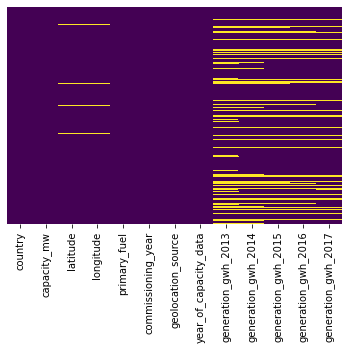

In [13]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [14]:
df.nunique()

country                    1
capacity_mw              250
latitude                 471
longitude                470
primary_fuel               5
commissioning_year        71
geolocation_source         1
year_of_capacity_data      1
generation_gwh_2013      364
generation_gwh_2014      374
generation_gwh_2015      398
generation_gwh_2016      405
generation_gwh_2017      408
dtype: int64

In [15]:
categorical_df=[j for j in df if df[j].dtype == 'object']

In [16]:
for i in categorical_df:
    columns = df[i].unique()
    print(i,columns)
    
#catagorical columns in dataset

country ['IND']
primary_fuel ['Gas' 'Coal' 'Hydro' 'Oil' 'Nuclear']
geolocation_source ['WRI']


In [17]:
df.head()

,country,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,geolocation_source,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
3,IND,135.0,23.8712,91.3602,Gas,2004.0,WRI,2018.0,631.777928,617.789264,843.7470,886.004428,663.774500
4,IND,1800.0,21.9603,82.4091,Coal,2015.0,WRI,2018.0,1668.290000,3035.550000,5916.3700,6243.000000,5385.579736
5,IND,250.0,23.7689,68.6447,Coal,2005.0,WRI,2018.0,821.798000,1153.421000,1208.8520,1175.765000,1147.913000
6,IND,60.0,10.4547,77.0078,Hydro,1970.0,WRI,2018.0,147.568450,157.558250,152.1952,61.421350,89.629600
7,IND,192.0,32.2258,77.2070,Hydro,2010.0,WRI,2018.0,696.738800,674.391100,721.3352,675.724400,679.594950


In [18]:
df.drop(['country','year_of_capacity_data'], inplace = True, axis = 1)

#Drop it because it have only 1 unique so there is no change on target

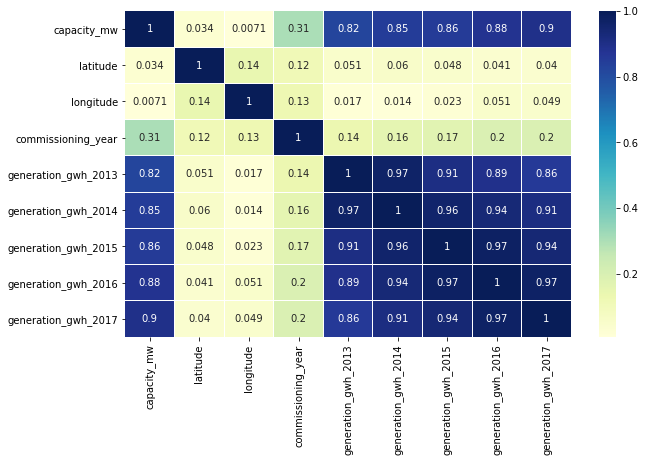

In [19]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),vmax=1,linewidth=0.1,annot = True,cmap='YlGnBu')
plt.xticks(rotation=90)
plt.show()

1)Capacity_mw have high co-relation with it's past power generation data of 2013 to 2017

2)Comminsioning year is not much effective on capacity of power plant

3)There is no negative co-relation between any columns


In [20]:
df.head()

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
3,135.0,23.8712,91.3602,Gas,2004.0,WRI,631.777928,617.789264,843.7470,886.004428,663.774500
4,1800.0,21.9603,82.4091,Coal,2015.0,WRI,1668.290000,3035.550000,5916.3700,6243.000000,5385.579736
5,250.0,23.7689,68.6447,Coal,2005.0,WRI,821.798000,1153.421000,1208.8520,1175.765000,1147.913000
6,60.0,10.4547,77.0078,Hydro,1970.0,WRI,147.568450,157.558250,152.1952,61.421350,89.629600
7,192.0,32.2258,77.2070,Hydro,2010.0,WRI,696.738800,674.391100,721.3352,675.724400,679.594950


In [21]:
capacity_avg = df.groupby('primary_fuel', as_index=False)['capacity_mw'].mean()

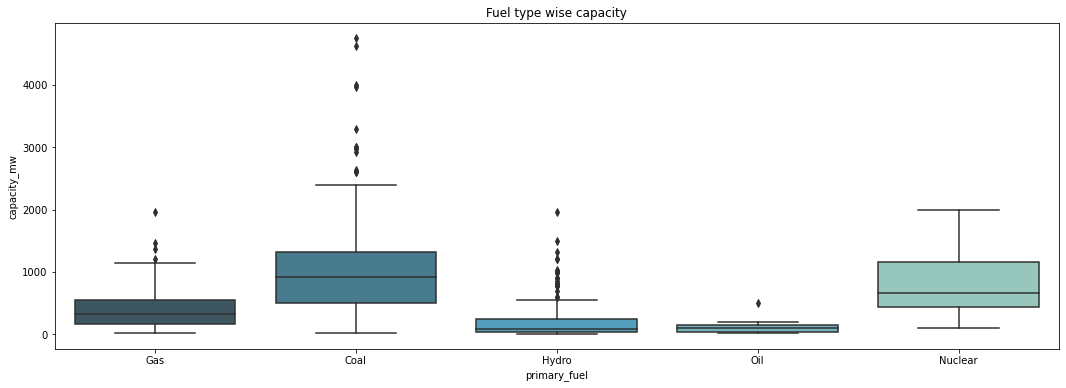

In [22]:
plt.figure(figsize = (18,6))
sns.boxplot(x = 'primary_fuel', y = 'capacity_mw', data = df, palette= 'GnBu_d').set_title('Fuel type wise capacity')
plt.xticks
plt.show()

Here, we can see that coal based plant have higher capacity wtih oil and hydro base plan have low power generation capacity

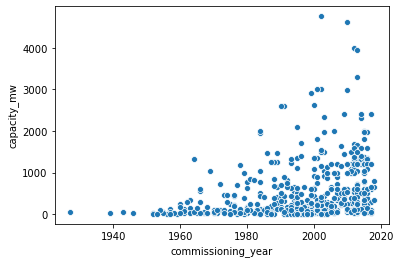

In [23]:
sns.scatterplot(x='commissioning_year',y='capacity_mw',data=df)

commisioning year metter regarding to capacity of power generation as commisioning year going to increase then capacity also increase

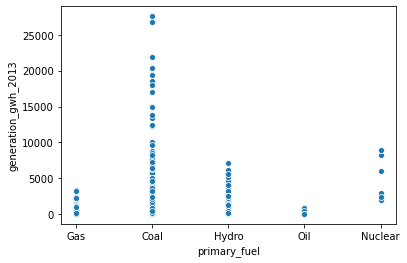

In [24]:
sns.scatterplot(x='primary_fuel',y='generation_gwh_2013',data=df)

IN 2013,

Leading fuel type is Coal in total power generation of year.

Nuclear have also good power generation with respect to no of powerplant which used nuclear as fuel

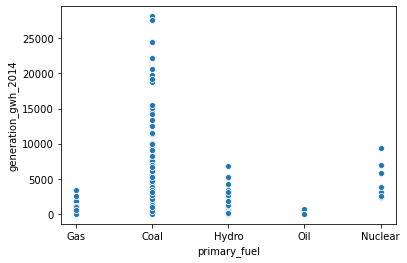

In [25]:
sns.scatterplot(x='primary_fuel',y='generation_gwh_2014',data=df)

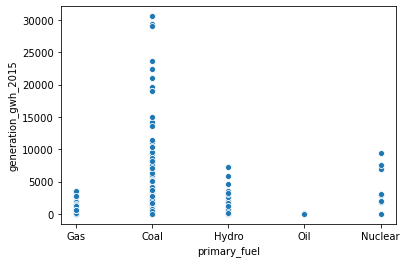

In [26]:
sns.scatterplot(x='primary_fuel',y='generation_gwh_2015',data=df)

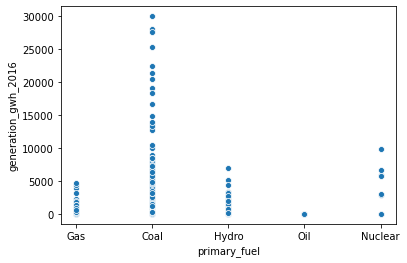

In [27]:
sns.scatterplot(x='primary_fuel',y='generation_gwh_2016',data=df)

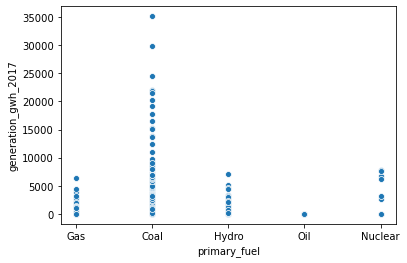

In [28]:
sns.scatterplot(x='primary_fuel',y='generation_gwh_2017',data=df)

IN 2017

One oil based plant have no power generation.

No of plants decrease in coal type fuel in reference to generate MW more then 25000

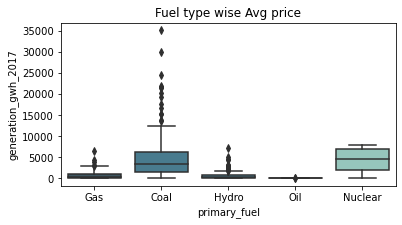

In [29]:
plt.figure(figsize = (6,3))
sns.boxplot(x = 'primary_fuel', y = 'generation_gwh_2017', data = df, palette= 'GnBu_d').set_title('Fuel type wise Avg price')
plt.xticks
plt.show()

In [30]:
df.isnull().sum()

capacity_mw              0
latitude                10
longitude               10
primary_fuel             0
commissioning_year       0
geolocation_source       0
generation_gwh_2013    119
generation_gwh_2014    102
generation_gwh_2015     78
generation_gwh_2016     66
generation_gwh_2017     62
dtype: int64

In [31]:
df['latitude'].fillna(int(df['latitude'].mean()), inplace=True)
df['longitude'].fillna(int(df['longitude'].mean()), inplace=True)
df['generation_gwh_2013'].fillna(int(df['generation_gwh_2013'].mean()), inplace=True)
df['generation_gwh_2014'].fillna(int(df['generation_gwh_2014'].mean()), inplace=True)
df['generation_gwh_2015'].fillna(int(df['generation_gwh_2015'].mean()), inplace=True)
df['generation_gwh_2016'].fillna(int(df['generation_gwh_2016'].mean()), inplace=True)
df['generation_gwh_2017'].fillna(int(df['generation_gwh_2017'].mean()), inplace=True)

#Here, we will Fill all null values with mean


In [32]:
df.isnull().sum()

capacity_mw            0
latitude               0
longitude              0
primary_fuel           0
commissioning_year     0
geolocation_source     0
generation_gwh_2013    0
generation_gwh_2014    0
generation_gwh_2015    0
generation_gwh_2016    0
generation_gwh_2017    0
dtype: int64

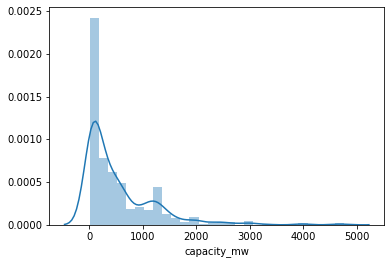

In [33]:
sns_plot = sns.distplot(df["capacity_mw"])

#Right skewed

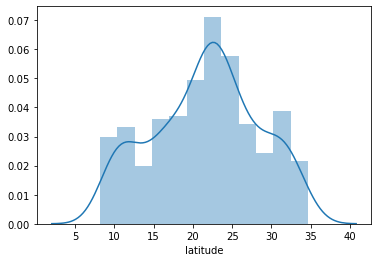

In [34]:
sns_plot = sns.distplot(df["latitude"])


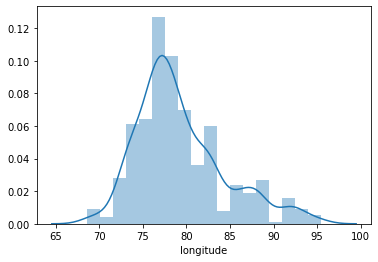

In [35]:
sns_plot = sns.distplot(df["longitude"])

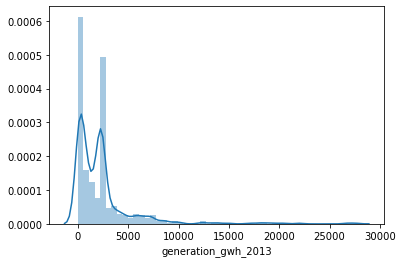

In [36]:
sns_plot = sns.distplot(df["generation_gwh_2013"])
#right skewed

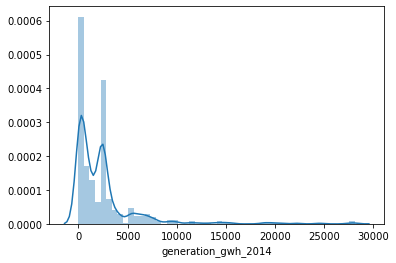

In [37]:
sns_plot = sns.distplot(df["generation_gwh_2014"])
#right Skewed

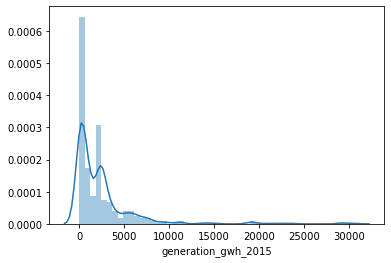

In [38]:
sns_plot = sns.distplot(df["generation_gwh_2015"])

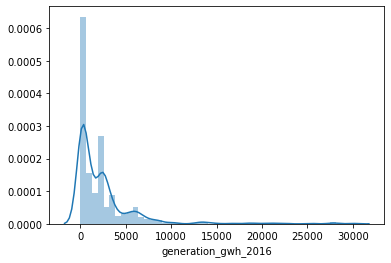

In [39]:
sns_plot = sns.distplot(df["generation_gwh_2016"])

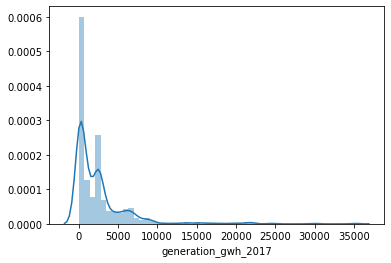

In [40]:
sns_plot = sns.distplot(df["generation_gwh_2017"])

In [41]:
df.skew()

#skewness is high in 

#commissioning_year    
#generation_gwh_2013    
#generation_gwh_2014    
#generation_gwh_2015    
#generation_gwh_2016    
#generation_gwh_2017    

capacity_mw            2.386155
latitude              -0.120033
longitude              0.919471
commissioning_year    -1.020944
generation_gwh_2013    3.906403
generation_gwh_2014    3.757751
generation_gwh_2015    4.000215
generation_gwh_2016    3.779987
generation_gwh_2017    3.811353
dtype: float64

In [42]:
df.drop(('geolocation_source'), inplace = True, axis = 1)


In [43]:
df.head()
df_c = df.copy()

In [44]:
df_dc = pd.get_dummies(df, columns=['primary_fuel'])

In [45]:
df_dc.head()

,capacity_mw,latitude,longitude,commissioning_year,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,primary_fuel_Coal,primary_fuel_Gas,primary_fuel_Hydro,primary_fuel_Nuclear,primary_fuel_Oil
3,135.0,23.8712,91.3602,2004.0,631.777928,617.789264,843.7470,886.004428,663.774500,0,1,0,0,0
4,1800.0,21.9603,82.4091,2015.0,1668.290000,3035.550000,5916.3700,6243.000000,5385.579736,1,0,0,0,0
5,250.0,23.7689,68.6447,2005.0,821.798000,1153.421000,1208.8520,1175.765000,1147.913000,1,0,0,0,0
6,60.0,10.4547,77.0078,1970.0,147.568450,157.558250,152.1952,61.421350,89.629600,0,0,1,0,0
7,192.0,32.2258,77.2070,2010.0,696.738800,674.391100,721.3352,675.724400,679.594950,0,0,1,0,0


In [46]:
from scipy.stats import boxcox

for col in df_dc:
    if df_dc[col].skew()>= 2.20:
        df_dc[col]=np.cbrt(df_dc[col]) 
    if df_dc[col].skew()<= -.80:
        df_dc[col]=np.power(df_dc[col],2)
        
#remove skewness using cube root method and power transformation

In [47]:
df_dc.skew()

capacity_mw             0.421268
latitude               -0.120033
longitude               0.919471
commissioning_year     -1.000781
generation_gwh_2013     0.286805
generation_gwh_2014     0.280457
generation_gwh_2015     0.394434
generation_gwh_2016     0.392552
generation_gwh_2017     0.339771
primary_fuel_Coal       0.514651
primary_fuel_Gas        2.385840
primary_fuel_Hydro      0.139921
primary_fuel_Nuclear    7.762105
primary_fuel_Oil        5.994415
dtype: float64

In [48]:
df = df_dc

Now data is ready for Regression and we will split our data in 2 parts with 80:20 ratio for training and testing

In [49]:
from sklearn.model_selection import train_test_split
x =df.drop('capacity_mw',axis=1)
y =df['capacity_mw']

In [50]:
from sklearn.preprocessing import StandardScaler
STD=StandardScaler()
x=STD.fit_transform(x)

In [51]:
for i in range(1,500):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=i)
    ln=LinearRegression()
    ln.fit(x_train,y_train)
    if round(ln.score(x_train,y_train)*100,2)==round(ln.score(x_test,y_test)*100,2):
        print('At random state',i,'score is best')
        print('Train score',ln.score(x_train,y_train)*100)
        print('Test Score',ln.score(x_test,y_test))

In [52]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

In [53]:
dtr=DecisionTreeRegressor()
svr=SVR()
svrl=SVR(kernel='linear')
kn=KNeighborsRegressor(n_neighbors=5)

In [54]:
def fun(f):
    f.fit(x_train,y_train)
    pred=f.predict(x_test)
    print('TRAINING:-',f.score(x_train,y_train)*100)
    print('MAE',mean_absolute_error(y_test,pred))
    print('MSE',mean_squared_error(y_test,pred))
    print('RMSE',np.sqrt(mean_squared_error(y_test,pred)))
    print('R2 Score',r2_score(y_test,pred)*100)

In [55]:
dtr.fit(x_train,y_train)
preddtr=dtr.predict(x_test)
print("DecisionTreeRegressor")
print('Training Score:-',dtr.score(x_train,y_train)*100)
print('MAE',mean_absolute_error(y_test,preddtr))
print('MSE',mean_squared_error(y_test,preddtr))
print('RMSE',np.sqrt(mean_squared_error(y_test,preddtr)))
print('R2 Score',r2_score(y_test,preddtr)*100)

DecisionTreeRegressor
Training Score:- 99.99817847928553
MAE 1.1271893643237525
MSE 2.175846666583489
RMSE 1.4750751393008725
R2 Score 77.9833710104906


In [56]:
fun(svr)

TRAINING:- 71.37730204100714
MAE 1.2482439340870173
MSE 3.336659605681758
RMSE 1.8266525684107962
R2 Score 66.2375121690317


In [57]:
fun(kn)

TRAINING:- 81.6717764472534
MAE 1.1133498181041706
MSE 2.7027678325392834
RMSE 1.644009681400716
R2 Score 72.65164061067142


In [58]:
from sklearn.ensemble import RandomForestRegressor

In [59]:
rd=RandomForestRegressor()
fun(rd)

TRAINING:- 98.14385640164728
MAE 0.7966034438867735
MSE 1.1247431721814798
RMSE 1.060539095074519
R2 Score 88.61911847433329


In [60]:
from sklearn.ensemble import AdaBoostRegressor
ad=AdaBoostRegressor()
fun(ad)

TRAINING:- 83.82747016965214
MAE 1.206611986326327
MSE 2.1067728080782735
RMSE 1.4514726342850124
R2 Score 78.68230514906716


In [61]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor

In [62]:
ad1=AdaBoostRegressor(n_estimators=500,learning_rate=1,random_state=0)
fun(ad1)

TRAINING:- 84.1885871013089
MAE 1.162940452111679
MSE 2.059084408076272
RMSE 1.4349510124308327
R2 Score 79.16484733647047


In [63]:
gd=GradientBoostingRegressor()

fun(gd)

TRAINING:- 96.0966621769399
MAE 0.8934459867013675
MSE 1.4158477458838663
RMSE 1.189894006155114
R2 Score 85.67353343160674


In [66]:
from sklearn.linear_model import ElasticNet
es=ElasticNet()

In [67]:
es1=ElasticNet(alpha=.001,max_iter=500,normalize=False,selection='random')

In [68]:
fun(es1)
predes=es1.predict(x_test)

TRAINING:- 60.483336819470324
MAE 1.5472367425175473
MSE 4.360743883830015
RMSE 2.0882394220562963
R2 Score 55.875162674348424


In [69]:
from sklearn.model_selection import cross_val_score

In [70]:
for i in range(2,8):
    crs_score=cross_val_score(ln,x,y,cv=i)
    score=crs_score.mean()
    print('CV Value',i)
    print('Score',score*100)

CV Value 2
Score 56.198436608569025
CV Value 3
Score 57.62485791379984
CV Value 4
Score 56.942676039811836
CV Value 5
Score 57.544426899946764
CV Value 6
Score 56.69453383870094
CV Value 7
Score 56.508799375723584


In [71]:
for i in range(2,8):
    crs_score=cross_val_score(svr,x,y,cv=i)
    score=crs_score.mean()
    print('CV Value',i)
    print('Score',score*100)

CV Value 2
Score 58.695371816597905
CV Value 3
Score 64.80727511843791
CV Value 4
Score 64.80358574178607
CV Value 5
Score 65.28945788605868
CV Value 6
Score 65.5373941171798
CV Value 7
Score 65.91274912541856


In [72]:
for i in range(2,8):
    crs_score=cross_val_score(dtr,x,y,cv=i)
    score=crs_score.mean()
    print('CV Value',i)
    print('Score',score*100)

CV Value 2
Score 71.97891206223478
CV Value 3
Score 73.35418816542398
CV Value 4
Score 72.16886316521006
CV Value 5
Score 73.52937094140296
CV Value 6
Score 71.13703749779214
CV Value 7
Score 74.47922456261801


In [73]:
for i in range(2,11):
    crs_score=cross_val_score(kn,x,y,cv=i)
    score=crs_score.mean()
    print('CV Value',i)
    print('Score',score*100)

CV Value 2
Score 66.6817122333594
CV Value 3
Score 68.9787746722685
CV Value 4
Score 68.97955699858413
CV Value 5
Score 70.0229992724623
CV Value 6
Score 69.88641576455626
CV Value 7
Score 69.97249193834833
CV Value 8
Score 69.66605805262763
CV Value 9
Score 69.03628571181277
CV Value 10
Score 70.31323688568371


In [74]:
for i in range(2,11):
    crs_score=cross_val_score(rd,x,y,cv=i)
    score=crs_score.mean()
    print('CV Value',i)
    print('Score',score*100)

CV Value 2
Score 84.7767103181655
CV Value 3
Score 86.61718784692077
CV Value 4
Score 86.85563159762356
CV Value 5
Score 86.25998561550826
CV Value 6
Score 86.15672761001312
CV Value 7
Score 85.97252748726268
CV Value 8
Score 86.46359403137761
CV Value 9
Score 86.1674725626624
CV Value 10
Score 86.35184008934104


In [75]:
for i in range(2,8):
    crs_score=cross_val_score(ad,x,y,cv=i)
    score=crs_score.mean()
    print('CV Value',i)
    print('Score',score*100)

CV Value 2
Score 76.9837994378415
CV Value 3
Score 78.80848580409626
CV Value 4
Score 79.88545151540804
CV Value 5
Score 78.67113355752964
CV Value 6
Score 77.76142100535563
CV Value 7
Score 78.38971099136273


In [76]:
for i in range(2,11):
    crs_score=cross_val_score(es1,x,y,cv=i)
    score=crs_score.mean()
    print('CV Value',i)
    print('Score',score*100)

CV Value 2
Score 56.25536403981408
CV Value 3
Score 57.64563492113005
CV Value 4
Score 56.98089638912164
CV Value 5
Score 57.56701451565442
CV Value 6
Score 56.72214199587633
CV Value 7
Score 56.538515838734135
CV Value 8
Score 57.06573306714455
CV Value 9
Score 56.85407761262965
CV Value 10
Score 57.30827827316287


In [77]:
for i in range(2,8):
    crs_score=cross_val_score(ad1,x,y,cv=i)
    score=crs_score.mean()
    print('CV Value',i)
    print('Score',score*100)

CV Value 2
Score 77.13526433504018
CV Value 3
Score 78.92168564478887
CV Value 4
Score 78.64808017268415
CV Value 5
Score 77.9179482994514
CV Value 6
Score 77.91047557256738
CV Value 7
Score 78.50759617270704


In [78]:
for i in range(2,8):
    crs_score=cross_val_score(gd,x,y,cv=i)
    score=crs_score.mean()
    print('CV Value',i)
    print('Score',score*100)

CV Value 2
Score 84.77781980331795
CV Value 3
Score 85.98065247839637
CV Value 4
Score 86.29010276107509
CV Value 5
Score 86.95542825253071
CV Value 6
Score 86.37128440098873
CV Value 7
Score 85.5737409437113


In [79]:
MODEL = pd.DataFrame()
MODEL['Model Name']=['DTR','SVR','KNN','RD','AD','AD1','GD','ES']
MODEL['RMSE']=[1.50,3.14,2.94,1.06,1.41,1.43,1.18,2.089]
MODEL['CVScore']=[73.29,0.54,29.18,86.82,79.12,78.92,86.69,57.54]
MODEL['R2']=[77.03,0.12,12.39,88.62,79.65,79.16,85.69,55.83]
MODEL['Difference'] = MODEL['R2']-MODEL['CVScore']

In [80]:
MODEL

,Model Name,RMSE,CVScore,R2,Difference
0,DTR,1.500,73.29,77.03,3.74
1,SVR,3.140,0.54,0.12,-0.42
2,KNN,2.940,29.18,12.39,-16.79
3,RD,1.060,86.82,88.62,1.80
4,AD,1.410,79.12,79.65,0.53
5,AD1,1.430,78.92,79.16,0.24
6,GD,1.180,86.69,85.69,-1.00
7,ES,2.089,57.54,55.83,-1.71


Here, we have 2 model which have good CV score. One is Random Forest(RD) and Gradientboost(GD)

From it we can see that Error is less in RD, R2 score & CV score are high in RD

diffrence is low in GD. 

Here i am going with RD as it have low error and high accuracy

In [81]:
import pickle
filename='POWER_GENERATION.pkl'
pickle.dump(rd,open(filename,'wb'))


        Actual    Predict
602   3.897390   3.047395
224   4.932424   3.000000
278   7.047299   5.848035
708  10.115331  12.506130
799   5.091643   4.626065
..         ...        ...
814   7.937005   6.694330
737   9.654894   9.165656
58   10.626586  10.969613
281  11.447142  11.186889
809  14.888056  14.422496

[101 rows x 2 columns]


Text(0.5, 1.0, 'Regressor Line')

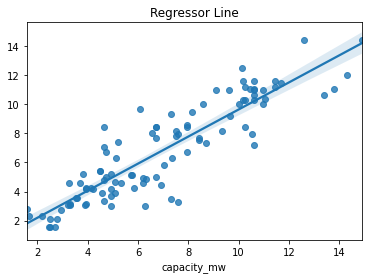

In [82]:
res=pd.DataFrame()
res['Actual']=y_test
res['Predict']=preddtr

res

print(res)
sns.regplot(y_test,preddtr)
plt.title('Regressor Line')

# PRIMARY FUEL_CLASSIFICATION

In [83]:
df_c.head()

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
3,135.0,23.8712,91.3602,Gas,2004.0,631.777928,617.789264,843.7470,886.004428,663.774500
4,1800.0,21.9603,82.4091,Coal,2015.0,1668.290000,3035.550000,5916.3700,6243.000000,5385.579736
5,250.0,23.7689,68.6447,Coal,2005.0,821.798000,1153.421000,1208.8520,1175.765000,1147.913000
6,60.0,10.4547,77.0078,Hydro,1970.0,147.568450,157.558250,152.1952,61.421350,89.629600
7,192.0,32.2258,77.2070,Hydro,2010.0,696.738800,674.391100,721.3352,675.724400,679.594950


In [87]:
from sklearn.preprocessing import LabelEncoder

for column in df_c.columns:
  if df_c[column].dtype == np.number:
    continue
  df_c[column] = LabelEncoder().fit_transform(df_c[column])

#encoding Fuel type for model purpose

In [85]:
df_c.head()

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
3,135.0,23.8712,91.3602,Gas,2004.0,631.777928,617.789264,843.7470,886.004428,663.774500
4,1800.0,21.9603,82.4091,Coal,2015.0,1668.290000,3035.550000,5916.3700,6243.000000,5385.579736
5,250.0,23.7689,68.6447,Coal,2005.0,821.798000,1153.421000,1208.8520,1175.765000,1147.913000
6,60.0,10.4547,77.0078,Hydro,1970.0,147.568450,157.558250,152.1952,61.421350,89.629600
7,192.0,32.2258,77.2070,Hydro,2010.0,696.738800,674.391100,721.3352,675.724400,679.594950


In [ ]:
df_c.tail()

In [ ]:
avg_fuel_13 = df_c.groupby(['primary_fuel']).apply(lambda df_c: round(df_c['generation_gwh_2013'].mean(), 0))
avg_fuel_14 = df_c.groupby(['primary_fuel']).apply(lambda df_c: round(df_c['generation_gwh_2014'].mean(), 0))
avg_fuel_15 = df_c.groupby(['primary_fuel']).apply(lambda df_c: round(df_c['generation_gwh_2015'].mean(), 0))
avg_fuel_16 = df_c.groupby(['primary_fuel']).apply(lambda df_c: round(df_c['generation_gwh_2016'].mean(), 0))
avg_fuel_17 = df_c.groupby(['primary_fuel']).apply(lambda df_c: round(df_c['generation_gwh_2017'].mean(), 0))
print(avg_fuel_13)
print(avg_fuel_14)
print(avg_fuel_15)
print(avg_fuel_16)
print(avg_fuel_17)

In [88]:
F0 = (4042,4380,4489,4657,4835)
F1 = (1010,926,947,854,966)
F2 = (1265,1257,1169,1141,1115)
F3 = (4377,4562,4235,4273,4323)
F4 = (342,341,204,193,978)

#fuel type and avg power generation year by year
#For coal type fuel- Power generation ratio increase year by year
#Nuclear and oil based powerplant power generation decrease year by year


In [89]:
df_c.head()

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
3,135.0,23.8712,91.3602,1,2004.0,631.777928,617.789264,843.7470,886.004428,663.774500
4,1800.0,21.9603,82.4091,0,2015.0,1668.290000,3035.550000,5916.3700,6243.000000,5385.579736
5,250.0,23.7689,68.6447,0,2005.0,821.798000,1153.421000,1208.8520,1175.765000,1147.913000
6,60.0,10.4547,77.0078,2,1970.0,147.568450,157.558250,152.1952,61.421350,89.629600
7,192.0,32.2258,77.2070,2,2010.0,696.738800,674.391100,721.3352,675.724400,679.594950


In [90]:
x =df_c.drop('primary_fuel',axis=1)
y =df_c['primary_fuel']

Scalling data on same scale for classification purpose

In [ ]:
from sklearn.preprocessing import StandardScaler

std=StandardScaler()
std.fit_transform(x)

In [98]:
df_c.head()

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
3,135.0,23.8712,91.3602,1,2004.0,631.777928,617.789264,843.7470,886.004428,663.774500
4,1800.0,21.9603,82.4091,0,2015.0,1668.290000,3035.550000,5916.3700,6243.000000,5385.579736
5,250.0,23.7689,68.6447,0,2005.0,821.798000,1153.421000,1208.8520,1175.765000,1147.913000
6,60.0,10.4547,77.0078,2,1970.0,147.568450,157.558250,152.1952,61.421350,89.629600
7,192.0,32.2258,77.2070,2,2010.0,696.738800,674.391100,721.3352,675.724400,679.594950


In [102]:
df_c.shape

(503, 10)

In [103]:
df_c.dtypes

capacity_mw            float64
latitude               float64
longitude              float64
primary_fuel             int32
commissioning_year     float64
generation_gwh_2013    float64
generation_gwh_2014    float64
generation_gwh_2015    float64
generation_gwh_2016    float64
generation_gwh_2017    float64
dtype: object

split data in 2 parts of training dataset and testing dataset

In [104]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y)
x_train.head()

,capacity_mw,latitude,longitude,commissioning_year,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
231,60.0,30.5307,77.4968,1978.0,229.0689,198.8209,188.1147,139.897,169.09030
172,500.0,19.9545,72.7478,1995.0,3738.8100,3642.2600,3480.7400,3394.367,3189.80000
817,750.0,19.0004,72.8983,1992.0,5004.0000,3797.0000,5064.0000,4683.000,4655.00000
272,420.0,21.6872,83.8600,1994.0,2547.1220,2498.5460,2772.8200,2885.673,2527.01700
842,1080.0,21.8858,83.1215,2016.0,2304.0000,2420.0000,54.6400,122.020,1324.32728


Import all models which we are going to check

In [105]:
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,f1_score
from sklearn.model_selection import GridSearchCV

In [106]:
dtc=DecisionTreeClassifier()
svc=SVC()
svcp=SVC(kernel='poly')
kn=KNeighborsClassifier(n_neighbors=5)
gb = GaussianNB()
rf = RandomForestClassifier(n_estimators=100)
dtc=DecisionTreeClassifier(criterion='entropy',splitter='best',max_features='sqrt')

In [94]:
def fun(f):
    f.fit(x_train,y_train)
    pred=f.predict(x_test)
    print('Score',f.score(x_train,y_train))
    print('Accuracy Score\n',accuracy_score(y_test,pred))
    print('Confusion Matrix\n',confusion_matrix(y_test,pred))
    print('Classification Report',classification_report(y_test,pred))

In [111]:
svc.fit(x_train,y_train)
pred=svc.predict(x_test)
print('Score',svc.score(x_train,y_train))
print('Accuracy Score\n',accuracy_score(y_test,pred))
print('Confusion Matrix\n',confusion_matrix(y_test,pred))
print('Classification Report',classification_report(y_test,pred))

Score 0.6551724137931034
Accuracy Score
 0.5952380952380952
Confusion Matrix
 [[18  0 23  0  0]
 [ 1  0 16  0  0]
 [ 4  0 57  0  0]
 [ 2  0  1  0  0]
 [ 0  0  4  0  0]]
Classification Report               precision    recall  f1-score   support

           0       0.72      0.44      0.55        41
           1       0.00      0.00      0.00        17
           2       0.56      0.93      0.70        61
           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00         4

    accuracy                           0.60       126
   macro avg       0.26      0.27      0.25       126
weighted avg       0.51      0.60      0.52       126



In [112]:
fun(rf)

Score 1.0
Accuracy Score
 0.7777777777777778
Confusion Matrix
 [[37  1  3  0  0]
 [ 5  5  7  0  0]
 [ 4  3 54  0  0]
 [ 2  0  0  0  1]
 [ 0  1  1  0  2]]
Classification Report               precision    recall  f1-score   support

           0       0.77      0.90      0.83        41
           1       0.50      0.29      0.37        17
           2       0.83      0.89      0.86        61
           3       0.00      0.00      0.00         3
           4       0.67      0.50      0.57         4

    accuracy                           0.78       126
   macro avg       0.55      0.52      0.53       126
weighted avg       0.74      0.78      0.75       126



In [113]:
fun(dtc)

Score 1.0
Accuracy Score
 0.7222222222222222
Confusion Matrix
 [[31  4  6  0  0]
 [ 2  9  5  0  1]
 [ 7  3 50  0  1]
 [ 2  0  0  0  1]
 [ 0  1  2  0  1]]
Classification Report               precision    recall  f1-score   support

           0       0.74      0.76      0.75        41
           1       0.53      0.53      0.53        17
           2       0.79      0.82      0.81        61
           3       0.00      0.00      0.00         3
           4       0.25      0.25      0.25         4

    accuracy                           0.72       126
   macro avg       0.46      0.47      0.47       126
weighted avg       0.70      0.72      0.71       126



In [114]:
fun(gb)

Score 0.6286472148541115
Accuracy Score
 0.6349206349206349
Confusion Matrix
 [[20  5 13  2  1]
 [ 2  6  5  0  4]
 [ 4  2 51  1  3]
 [ 2  0  1  0  0]
 [ 0  0  1  0  3]]
Classification Report               precision    recall  f1-score   support

           0       0.71      0.49      0.58        41
           1       0.46      0.35      0.40        17
           2       0.72      0.84      0.77        61
           3       0.00      0.00      0.00         3
           4       0.27      0.75      0.40         4

    accuracy                           0.63       126
   macro avg       0.43      0.49      0.43       126
weighted avg       0.65      0.63      0.63       126



In [115]:
fun(svcp)

Score 0.649867374005305
Accuracy Score
 0.5873015873015873
Confusion Matrix
 [[16  0 25  0  0]
 [ 0  0 17  0  0]
 [ 3  0 58  0  0]
 [ 2  0  1  0  0]
 [ 0  0  4  0  0]]
Classification Report               precision    recall  f1-score   support

           0       0.76      0.39      0.52        41
           1       0.00      0.00      0.00        17
           2       0.55      0.95      0.70        61
           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00         4

    accuracy                           0.59       126
   macro avg       0.26      0.27      0.24       126
weighted avg       0.52      0.59      0.51       126



In [116]:
from sklearn.ensemble import GradientBoostingClassifier,AdaBoostClassifier

In [117]:
ad=AdaBoostClassifier()
ad.fit(x_train,y_train)
predad=ad.predict(x_test)
print('Score',ad.score(x_train,y_train))
print('Accuracy Score\n',accuracy_score(y_test,predad))
print('Confusion Matrix\n',confusion_matrix(y_test,predad))
print('Classification Report',classification_report(y_test,predad))

Score 0.6976127320954907
Accuracy Score
 0.6825396825396826
Confusion Matrix
 [[34  0  5  0  2]
 [ 7  0  7  0  3]
 [ 8  0 49  0  4]
 [ 2  0  0  0  1]
 [ 0  0  1  0  3]]
Classification Report               precision    recall  f1-score   support

           0       0.67      0.83      0.74        41
           1       0.00      0.00      0.00        17
           2       0.79      0.80      0.80        61
           3       0.00      0.00      0.00         3
           4       0.23      0.75      0.35         4

    accuracy                           0.68       126
   macro avg       0.34      0.48      0.38       126
weighted avg       0.61      0.68      0.64       126



In [118]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

In [119]:
score=cross_val_score(svc,x,y,cv=10)
print(score.mean())

0.6383529411764706


In [120]:
score=cross_val_score(svcp,x,y,cv=10)
print(score.mean())

0.6264313725490196


In [121]:
score=cross_val_score(dtc,x,y,cv=10)
print(score.mean())

0.717843137254902


In [124]:
score=cross_val_score(kn,x,y,cv=14)
print(score.mean())

0.7158163265306123


In [125]:
score=cross_val_score(rf,x,y,cv=14)
print(score.mean())

0.8153061224489796


In [126]:
score=cross_val_score(ad,x,y,cv=10)
print(score.mean())

0.6581960784313725


In [129]:
import pickle
filename='power_gen.pkl'
pickle.dump(rf,open(filename,'wb'))

Here, we have Randomforestclassifier with highest accuracy and good precision and recall ratio that's why we are going to select and dump it.

     Actual  Predict
6         2        2
211       1        2
499       0        2
598       0        0
483       0        0
..      ...      ...
575       2        2
434       2        2
530       2        2
379       3        0
682       2        2

[126 rows x 2 columns]


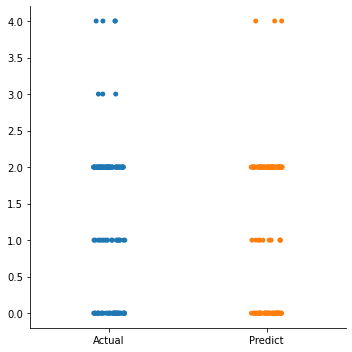

In [128]:
res=pd.DataFrame()
res['Actual']=y_test
res['Predict']=rf.predict(x_test)

print(res)
sns.catplot(data=res)

# THANK YOU